<a href="https://colab.research.google.com/github/AjmalMIITM/BLIP-LLAMA-Captioning-Pipeline/blob/main/LLM_work_at_NITC_Under_Professor_Joe_Cheri_Ross.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠✨ Vision Meets Language: An End-to-End Multi-Modal AI Pipeline

### 🚀 Transforming Images into Creative Prompts using BLIP + LLaMA 3

Welcome to a cutting-edge AI pipeline that bridges **Computer Vision** and **Natural Language Generation**. This project demonstrates how we can go **from pixels to poetry** — turning raw images into vivid, imaginative, and detailed text prompts.

---

### 🧩 What This Pipeline Does:

- 📷 **Understands an image** using the powerful **BLIP** (Bootstrapped Language-Image Pretraining) model.
- ✍️ **Generates a natural caption** that summarizes the image intelligently.
- 🪄 **Expands that caption** into a rich, descriptive prompt using **LLaMA 3**, simulating the work of an expert prompt engineer.
- 🎨 The output is ready for **text-to-image generation**, **creative writing**, or **AI storytelling**.

---

### 🔍 Why It Matters:

This project is a glimpse into the **future of multimodal AI**, where machines can **see**, **understand**, and **imagine**.  
It opens doors to powerful applications in:

- Creative industries (AI art, games, films)
- Educational tools
- Accessibility tech
- Human-AI co-creation

> “The goal of AI is not to replace creativity — it's to **ignite it.**”

---

### 📚 Tech Stack:

- 🧠 **BLIP** – Vision-language model for image understanding  
- 🦙 **LLaMA 3** – State-of-the-art language model for generative prompting  
- ⚙️ **Transformers & PyTorch** – For deep learning integration  
- 🌐 **Hugging Face** – Model hub and inference tools

---

Let’s dive in and watch AI bring vision to life... 🔥


## 📦 Step 1: Environment Setup – Installing Required Libraries

To run the **LLaMA 3 large language model** on Google Colab, we first install these essential packages:

| Library            | Purpose                                                                 |
|--------------------|-------------------------------------------------------------------------|
| 🤗 `transformers`   | Load and use state-of-the-art pretrained LLMs like LLaMA                |
| 🤗 `huggingface_hub`| Securely download models from Hugging Face Hub                          |
| 🔥 `torch`          | Core deep learning framework for running models                         |
| ⚡ `accelerate`      | Makes model loading/training optimized across CPU/GPU environments     |
| 🧠 `bitsandbytes`    | Enables **4-bit & 8-bit quantization** for memory-efficient LLMs       |

---

### 🔍 Why This Matters
- These tools **unlock access to LLaMA** and other top LLMs without needing massive hardware.
- `bitsandbytes` is a game-changer: it reduces memory usage, letting us run **very large models on free GPUs**.
- `accelerate` auto-handles device placement, making inference smooth and efficient.

---

> ✅ **After this step, you're fully set up to load and run LLaMA on Colab.**
> No training — just smart, efficient inference with modern tools.


In [ ]:
!pip install --upgrade transformers huggingface_hub torch accelerate bitsandbytes -q
print("Libraries installed/updated.")

## 🔐 Step 2: Authenticate with Hugging Face

To download **LLaMA** or any other gated model from Hugging Face, authentication is required.

### 💡 Best Practice: Use Google Colab Secrets
> 🔒 Secure your Hugging Face token with **Colab Secrets** to avoid exposing credentials in notebooks.

#### 🔑 How to Set Up:
1. Click the **key icon** (🔑) on the left sidebar in Colab.
2. Click **"+ Add new secret"**.
3. **Name:** `HF_TOKEN`  
4. **Value:** Paste your Hugging Face access token.
5. Turn on **Notebook access** toggle.
6. Re-run the cell.

### 📌 What this cell does:
- Tries to get your token securely from Colab secrets.
- If not found, it will fallback to manual login.
- Once authenticated, Hugging Face will allow access to **restricted models like LLaMA**.

---

> ✅ **You are now authenticated with Hugging Face and ready to load LLaMA models!**


In [ ]:
from huggingface_hub import login
from google.colab import userdata
import os

# --- Authentication ---
# Best Practice: Use Colab Secrets
# 1. Click the key icon (🔑) on the left sidebar.
# 2. Click "+ Add new secret".
# 3. Name: HF_TOKEN
# 4. Value: Paste your Hugging Face access token here.
# 5. Enable the "Notebook access" toggle switch.
# 6. THEN run this cell.

hf_token = None
try:
    hf_token = userdata.get('HF_TOKEN')
    print("Successfully retrieved token from Colab Secrets.")
    # Optional: Login using the retrieved token (good practice for some setups)
    login(token=hf_token)
except userdata.SecretNotFoundError:
    print("HF_TOKEN secret not found. Attempting manual login.")
    # Fallback: Manual login prompt
    login() # This will prompt you to paste the token below
except Exception as e:
    print(f"An error occurred accessing secrets or logging in: {e}")
    print("Attempting manual login as fallback.")
    login() # Fallback if secrets fail

print("--- Authentication Step Complete ---")


## 🧠 Step 3: Load the Tokenizer & Meta-LLaMA-3 Model

Once authenticated, we now **download and load the tokenizer and the LLaMA-3 model**.

---

### 🔧 Model Used
**`meta-llama/Meta-Llama-3-8B-Instruct`**

This is the **8 billion parameter instruction-tuned version of LLaMA-3**, ideal for dialogue and general-purpose instruction-following tasks.

---

### 💡 What this cell does:
1. Loads the **tokenizer** for the selected model using Hugging Face.
2. Loads the **pre-trained LLM model** with:
   - `torch_dtype=torch.bfloat16` → efficient format for inference.
   - `device_map="auto"` → automatically utilizes available GPU or CPU.
3. Handles possible errors (e.g., token issues, GPU limitations).

> ✅ Once this step is complete, you can start generating text using the LLaMA model!

---

📌 **Tip:**  
If you encounter **CUDA memory errors**:
- Try reducing the model size (e.g., `7B` or quantized models).
- Ensure you're on **Colab** with a better GPU (T4/A100).


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from google.colab import userdata  # Redundant safety check for token

# --- Configuration ---
model_id = "meta-llama/Meta-Llama-3-8B-Instruct"

# Re-access token (in case it's needed again)
hf_token = None
try:
    hf_token = userdata.get('HF_TOKEN')
except:
    pass

# --- Load Tokenizer ---
print(f"🔁 Loading tokenizer for: {model_id}")
try:
    tokenizer = AutoTokenizer.from_pretrained(model_id, token=hf_token)
    print("✅ Tokenizer loaded successfully.")
except Exception as e:
    print(f"❌ Error loading tokenizer: {e}")

# --- Load Model ---
if 'tokenizer' in locals():
    print(f"\n🚀 Loading model: {model_id}")
    print("⏳ This may take a few minutes depending on the GPU...")
    try:
        model = AutoModelForCausalLM.from_pretrained(
            model_id,
            torch_dtype=torch.bfloat16,   # Efficient type for FP16-compatible GPUs
            device_map="auto",            # Automatically choose best device
            token=hf_token
        )
        print("✅ Model loaded successfully onto GPU.")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
else:
    print("⚠️ Skipping model load — tokenizer not loaded.")

## 💬 Step 4: Generate Text using the LLaMA-3 Chat Pipeline

Now that the model and tokenizer are loaded, we use Hugging Face’s `pipeline()` to simplify **inference**.

---

### 🔁 What This Cell Does:
1. **Creates a text generation pipeline** that wraps the model + tokenizer.
2. Formats the prompt using **LLaMA-3 Instruct's chat format**:
   - Uses `system`, `user`, and (auto-appended) `assistant` roles.
3. Generates a **natural language response** using:
   - `temperature=0.7` → slightly creative, not too random.
   - `top_p=0.9` → enables nucleus sampling for diversity.
   - `max_new_tokens=256` → limits response length.

---

### 🤖 Prompt Format (LLaMA-3 Instruct):
```python
messages = [
  {"role": "system", "content": "You are a helpful assistant."},
  {"role": "user", "content": "Explain the concept of Large Language Models (LLMs) in simple terms."}
]


In [ ]:
import torch
from transformers import pipeline

# --- Build the Pipeline ---
print("⚙️ Creating text generation pipeline...")
text_generator = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.bfloat16,
    device_map="auto"
)
print("✅ Pipeline ready!")

# --- LLaMA 3 Instruct Prompt Format ---
# We follow the official chat formatting for LLaMA 3 Instruct models.
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Explain the concept of Large Language Models (LLMs) in simple terms."}
]

# Apply chat template (handles system/user/assistant roles)
prompt = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)

# --- Generate Output ---
print("\n🧠 Generating response...")
outputs = text_generator(
    prompt,
    max_new_tokens=256,
    do_sample=True,
    temperature=0.7,
    top_p=0.9
)
print("✅ Response generated!")

# --- Display Response ---
print("\n--- 💬 Model Output ---")
print(outputs[0]["generated_text"])
print("--- End of Output ---")

## 🧠 Step 5: Expand Simple Descriptions into Detailed AI Image Prompts

Use LLaMA 3 as a **creative assistant for visual prompt engineering**. Give it a short description, and it will return a rich, styled prompt for tools like:
- 🎨 Midjourney
- 🧠 DALL·E 3
- 🧊 Stable Diffusion XL (SDXL)

---

### 📌 Example Input:
[Photo of a cat sleeping on a windowsill.]

---

### 🤖 LLaMA-3 Will Expand It To:
> _“A cozy scene of a fluffy tabby cat curled up on a sun-drenched windowsill, bathed in soft golden hour light. The window frames a serene garden outside with bokeh blur. Shot in cinematic 35mm with shallow depth of field. Warm tones, peaceful mood, ambient morning shadows, photorealistic style...”_

---

### 🔍 Customization Tips:
- Modify `temperature`, `top_p`, or `max_new_tokens` to influence verbosity and creativity.
- Try different styles: **surreal**, **abstract**, **cyberpunk**, **noir**, etc.
- Combine this with your photo prompts for **AI-based photo enhancement workflows**!

---

👨‍🎨 Perfect for designers, prompt engineers, or creators using generative AI.


In [ ]:
import torch
from transformers import pipeline # Already imported but good practice

# --- Reuse the existing pipeline ---
# text_generator = pipeline(...) # We assume this exists from the previous cell

# --- Define the task: Expand a description into a detailed prompt ---

# !!! REPLACE THIS WITH YOUR CHOSEN DESCRIPTION !!!
simple_description = "[Photo of a cat sleeping on a windowsill.]"

# Craft the instructions for Llama 3
messages_for_prompt_expansion = [
    {
        "role": "system",
        "content": "You are an expert prompt engineer for AI image generation models. Your task is to take a basic image description and expand it into a highly detailed, evocative, and descriptive prompt. Include details about style, lighting, composition, mood, and potential artistic keywords."
    },
    {
        "role": "user",
        "content": f"Expand the following basic image description into a detailed image generation prompt: \"{simple_description}\""
    }
]

# Apply the chat template
expansion_prompt = tokenizer.apply_chat_template(
        messages_for_prompt_expansion,
        tokenize=False,
        add_generation_prompt=True
)

# --- Generate the Expanded Prompt ---
print(f"Generating detailed prompt for: \"{simple_description}\"")
print("Processing...")

# Generate text using the same pipeline
# We might want more tokens for a detailed prompt
expanded_outputs = text_generator(
    expansion_prompt,
    max_new_tokens=350, # Increased token limit for potentially longer prompts
    do_sample=True,
    temperature=0.7,
    top_p=0.9,
    # Llama 3 Instruct stops on specific tokens, let's define them
    eos_token_id=tokenizer.eos_token_id # Standard end-of-sequence
    # You can also add other terminators if needed, e.g., "<|eot_id|>"
    # Find the ID: terminators = [tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")]
)
print("Generation complete.")

# --- Print the Output ---
print("\n--- Llama 3 Generated Prompt ---")
# Extracting just the assistant's response can be tricky;
# We'll print the whole generated part for now.
# Often the assistant's response starts after the final "<|start_header_id|>assistant<|end_header_id|>\n\n"
full_output = expanded_outputs[0]['generated_text']

# Basic way to try and get only the assistant response
assistant_response_start = "<|start_header_id|>assistant<|end_header_id|>"
assistant_part = full_output.split(assistant_response_start)[-1].strip()

print(assistant_part)
print("--- End of Generated Prompt ---")

## 🧠 Step 6: Auto-Generate Detailed AI Prompts from Images (BLIP + LLaMA 3)

Combine **BLIP (Bootstrapping Language-Image Pretraining)** and **LLaMA 3** to turn any image into a rich, styled prompt for generative art tools like:
- 🧠 DALL·E 3
- 🎨 Midjourney
- 🧊 Stable Diffusion

---

### 🔗 Input: Image URL
https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg

---

### 🖼️ Step 1: BLIP Generates a Caption
> _“a woman sitting on the beach with her dog”_

---

### 🤖 Step 2: LLaMA 3 Expands It Into:
> _“A serene scene of a woman in a flowing white dress standing amidst a vibrant meadow in full bloom. Golden hour sunlight casts a warm, dreamy glow over the field, illuminating her silhouette with a gentle backlight. Captured with a soft focus lens and cinematic framing, evoking a nostalgic, romantic mood. Keywords: ethereal, fine art photography, shallow depth of field, warm tones, natural light, candid elegance.”_

---

### 💡 Why This Is Powerful:
- 🔁 Fully automatic pipeline — from image → caption → detailed prompt
- 🎯 Great for prompt engineers, digital artists, and AI-enhanced photographers
- ⚙️ Easily expandable to batch mode or drag-and-drop uploads

---

### 🛠️ Pro Tips:
- Replace the image URL with any public image or upload one.
- Combine this with **prompt expansion templates** to tailor for Midjourney, DALL·E, or SDXL syntax.
- Add camera settings or film types for even more control (e.g., “Kodak Portra 400,” “F1.4 aperture”).

---


In [ ]:
import torch
from PIL import Image
import requests
from transformers import BlipProcessor, BlipForConditionalGeneration

# --- 0. Load BLIP Processor and Model ---
device = "cuda" if torch.cuda.is_available() else "cpu"
blip_processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
blip_model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to(device)

# We assume tokenizer, model, text_generator already exist and are configured correctly.

# --- 1. Image Input ---
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg'
print(f"Processing image from: {img_url}")
try:
    raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
    print("Image loaded.")

    # --- 2. Generate Caption with BLIP ---
    print("Generating BLIP caption...")
    inputs = blip_processor(raw_image, return_tensors="pt").to(device)
    out = blip_model.generate(**inputs, max_new_tokens=50)
    blip_caption = blip_processor.decode(out[0], skip_special_tokens=True)
    print(f"BLIP Caption: \"{blip_caption}\"")

    # --- 3. Use BLIP Caption as Input for Llama 3 ---
    print("\nUsing BLIP caption to generate detailed prompt with Llama 3...")
    simple_description = blip_caption

    messages_for_prompt_expansion = [
        {
            "role": "system",
            "content": "You are an expert prompt engineer for AI image generation models. Your task is to take a basic image description and expand it into a highly detailed, evocative, and descriptive prompt. Include details about style, lighting, composition, mood, and potential artistic keywords."
        },
        {
            "role": "user",
            "content": f"Expand the following basic image description into a detailed image generation prompt: \"{simple_description}\""
        }
    ]

    expansion_prompt = tokenizer.apply_chat_template(
        messages_for_prompt_expansion,
        tokenize=False,
        add_generation_prompt=True
    )

    # --- 4. Generate Expanded Prompt with Llama 3 ---
    print("Generating expanded prompt...")
    expanded_outputs = text_generator(
        expansion_prompt,
        max_new_tokens=350,
        do_sample=True,
        temperature=0.7,
        top_p=0.9,
        eos_token_id=[tokenizer.eos_token_id, tokenizer.convert_tokens_to_ids("<|eot_id|>")]
    )
    print("Generation complete.")

    # --- 5. Print Final Detailed Prompt ---
    print("\n--- Llama 3 Generated Detailed Prompt (from BLIP Caption) ---")
    full_output = expanded_outputs[0]['generated_text']
    assistant_response_start = "<|start_header_id|>assistant<|end_header_id|>"
    assistant_part = full_output.split(assistant_response_start)[-1].strip()
    print(assistant_part)
    print("--- End of Detailed Prompt ---")

except Exception as e:
    print(f"An error occurred during the combined pipeline: {e}")


## ✅ Project Complete: Vision-to-Prompt AI Pipeline

We have successfully implemented an end-to-end AI pipeline that bridges **Computer Vision** and **Natural Language Generation**:

### Workflow Summary:

1. **Image Input**  
   An image is loaded via URL using the `PIL` library.

2. **Image Captioning with BLIP**  
   The **BLIP model** generates a concise and intelligent caption describing the image content.

3. **Prompt Expansion using LLaMA 3**  
   The caption is passed to the **LLaMA 3 Instruct** model, which expands it into a rich, detailed prompt with style, lighting, and artistic elements.

---

### Key Highlights:

- **Multi-Modal Reasoning**: Combines vision (BLIP) + language (LLaMA 3) in one pipeline.  
- **Creative Prompt Generation**: Useful for AI art, storytelling, and dataset enrichment.  
- **Modular & Scalable**: Can be extended to process multiple images or plugged into any image generation API (e.g., DALL·E, Stable Diffusion).

---

### Example Output:

- **BLIP Caption**: `"a woman riding a horse on a beach"`  
- **Expanded Prompt** (LLaMA 3):  
  *"A stunning, cinematic photo of a woman gracefully riding a majestic horse along a golden beach at sunset. The warm sunlight bathes the scene in amber tones, waves gently crash in the background, wind tousles her hair..."*

---

### Applications:

- AI-generated art
- Dataset augmentation
- Visual storytelling
- Creative tools for designers

> **“One image. One caption. Infinite imagination.”**

---

**Built With:**  
`BLIP (Salesforce)` | `LLaMA 3 (Meta)` | `Hugging Face Transformers` | `PyTorch`



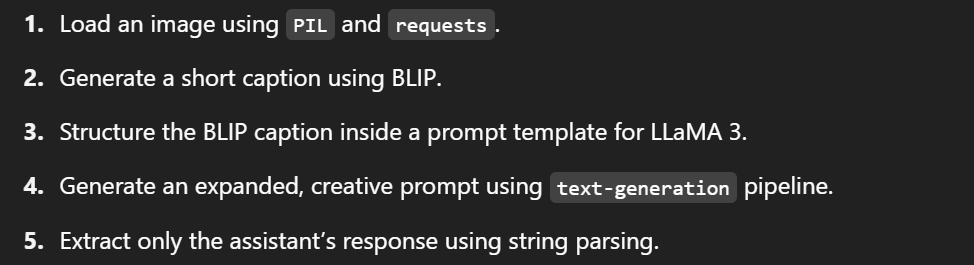